<a href="https://colab.research.google.com/github/npl0204/MushroomSecondary/blob/main/mushroomSecondary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Data and Package

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
mushroom = pd.read_csv("/content/drive/MyDrive/Logistic Regression/secondary_data.csv", sep = ";")
mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


## Data Wrangling and Cleansing

In [4]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [5]:
mushroom.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [6]:
mushroomNA = ["cap-surface", "gill-attachment", "gill-spacing", "stem-root", "stem-surface", "veil-type", "veil-color","ring-type", "spore-print-color"]
for feature in mushroomNA:
    mushroom[feature].fillna("NA", inplace = True)

In [7]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  object 
 12  stem-surface          61069 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             61069 non-null  object 
 15  veil-color         

## Data Analysis

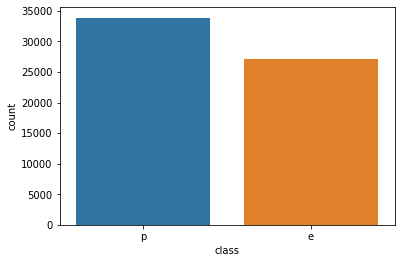

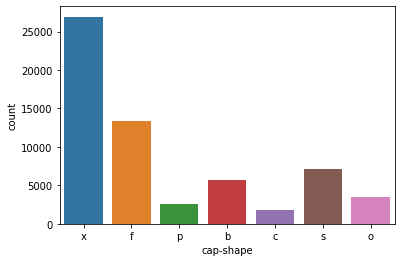

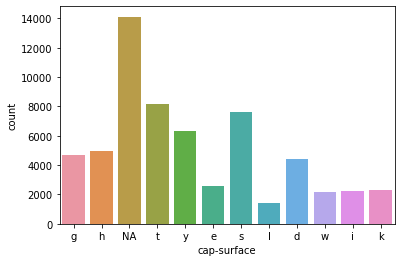

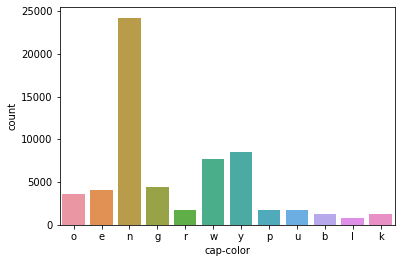

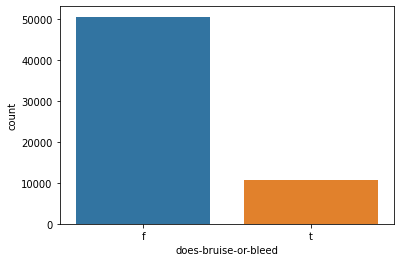

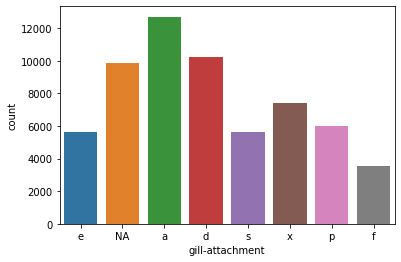

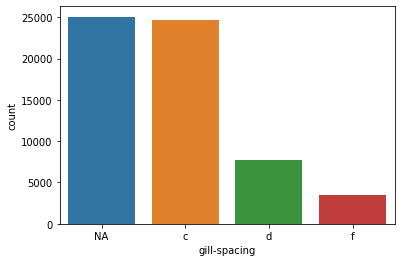

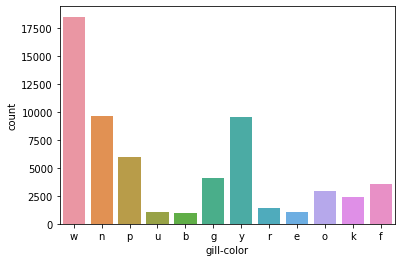

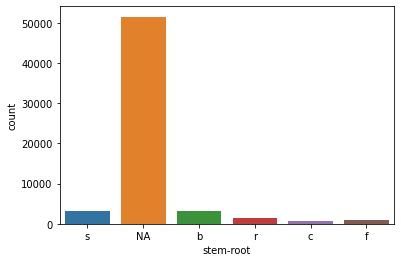

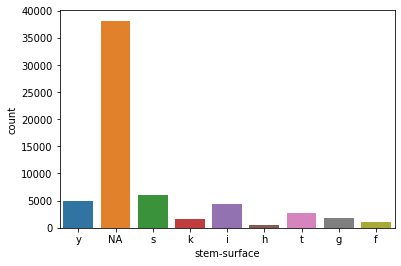

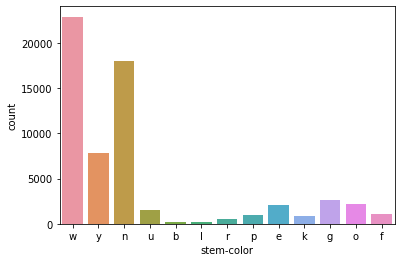

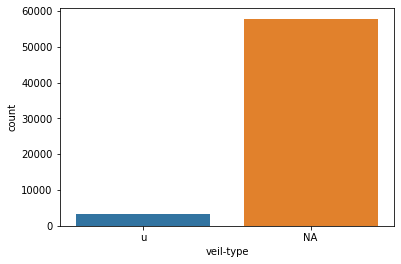

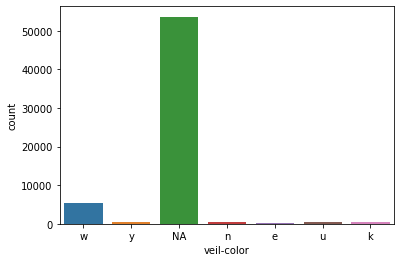

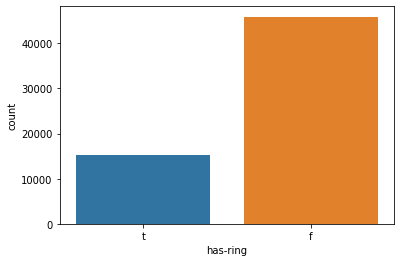

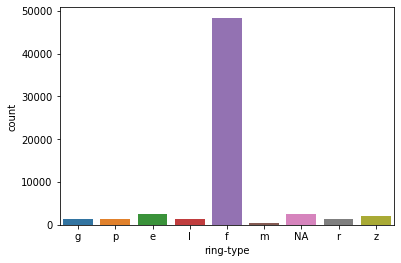

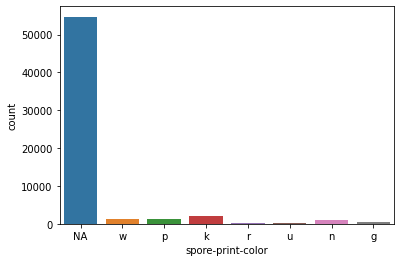

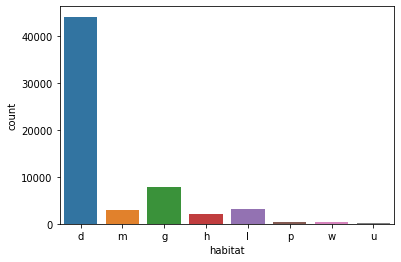

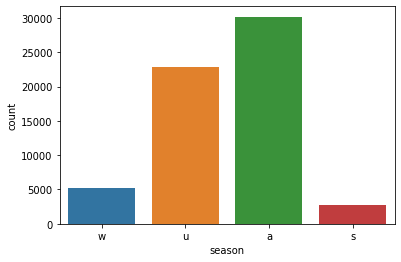

In [8]:
category = mushroom.drop(["cap-diameter", "stem-height", "stem-width"], axis = 1)
for i in category.columns: 
    sns.countplot(x = i, data = category)
    plt.show()

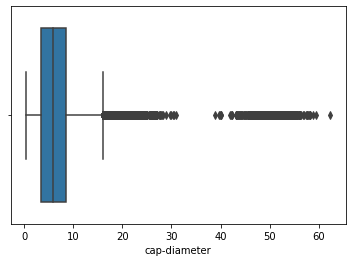

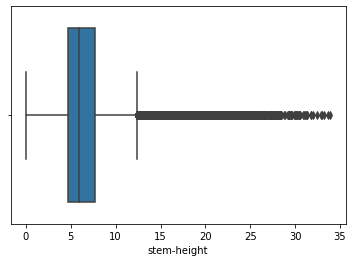

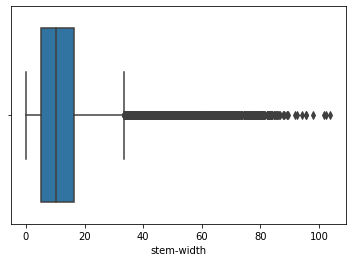

In [9]:
numerical = mushroom[["cap-diameter", "stem-height", "stem-width"]]
for i in numerical.columns: 
    sns.boxplot(x = i, data = numerical)
    plt.show()

## Machine Learning Models

### **Splitting Dataset**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
import matplotlib.pyplot as plt
from numpy import argmax

In [11]:
X = pd.get_dummies(mushroom.drop(["class"], axis = 1), drop_first = True)
y = pd.get_dummies(mushroom["class"], drop_first = True) # y should be a 1d array -> drop_first = True

Divide **train-validation-tuning-test** into three set **70-10-10-10** and **50-15-15-20** and **25-25-25-25**

In [12]:
# 70-10-10-10
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size = 0.1/0.9, random_state = 42, stratify = y_train1)
X_train1, X_tuning1, y_train1, y_tuning1 = train_test_split(X_train1, y_train1, test_size = 0.1/0.8, random_state = 42, stratify = y_train1)

In [13]:
# 50-15-15-20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size = 0.15/0.8, random_state = 42, stratify = y_train2)
X_train2, X_tuning2, y_train2, y_tuning2 = train_test_split(X_train2, y_train2, test_size = 0.15/0.65, random_state = 42, stratify = y_train2)

In [14]:
# 25-25-25-25
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size = 0.25/0.75, random_state = 42, stratify = y_train3)
X_train3, X_tuning3, y_train3, y_tuning3 = train_test_split(X_train3, y_train3, test_size = 0.25/0.5, random_state = 42, stratify = y_train3)

### **Logistic Regression**

#### **No tuning**

In [15]:
logmodel = LogisticRegression(max_iter = 10000)
logmodel.fit(X_train1, y_train1.values.ravel()) # ravel() to return a contiguous flattened array -> ensure a 1d array

predictions = logmodel.predict(X_test1)

print("accuracy_score =", accuracy_score(y_test1, predictions))
print("confusion_matrix \n", confusion_matrix(y_test1, predictions))
print("f1 =", f1_score(predictions, y_test1))

accuracy_score = 0.8581955133453414
confusion_matrix 
 [[2295  423]
 [ 443 2946]]
f1 = 0.8718555785735425


#### **Tuning**

In [16]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype("int")

##### **Set 70-10-10-10**

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)
X_tuning_scaled = scaler.transform(X_tuning1)

LR1 = LogisticRegression(max_iter = 10000)
LR1.fit(X_train_scaled, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

Best Threshold = 0.5479320978415423, F-Score = 0.8799156245291546


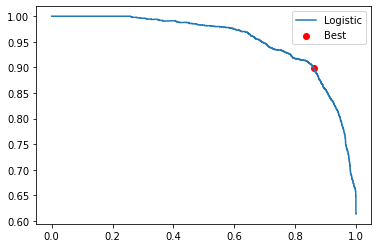

In [18]:
predictProba = LR1.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning1, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'Logistic')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [19]:
predictProba = LR1.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test1, y_pred))
print("confusion matrix\n", confusion_matrix(y_test1, y_pred))
print("precision score =", str(precision_score(y_test1, y_pred)))
print("recall score =", str(recall_score(y_test1, y_pred)))
print("f1 score =", str(f1_score(y_test1, y_pred)))

accuracy score = 0.8627804159161618
confusion matrix
 [[2371  347]
 [ 491 2898]]
precision score = 0.8930662557781202
recall score = 0.8551195042785482
f1 score = 0.8736810370817003


##### **Set 50-15-15-20**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)
X_tuning_scaled = scaler.transform(X_tuning2)

LR2 = LogisticRegression(max_iter = 10000)
LR2.fit(X_train_scaled, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

Best Threshold = 0.5091437628997343, F-Score = 0.8773885350318471


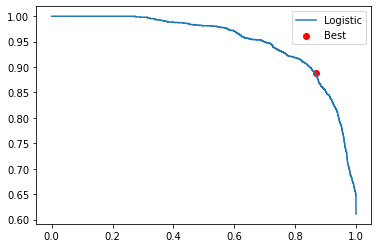

In [21]:
predictProba = LR2.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning2, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'Logistic')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [22]:
predictProba = LR2.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test2, y_pred))
print("confusion matrix\n", confusion_matrix(y_test2, y_pred))
print("precision score =", str(precision_score(y_test2, y_pred)))
print("recall score =", str(recall_score(y_test2, y_pred)))
print("f1 score =", str(f1_score(y_test2, y_pred)))

accuracy score = 0.867692811527755
confusion matrix
 [[4635  801]
 [ 815 5963]]
precision score = 0.881578947368421
recall score = 0.8797580407199764
f1 score = 0.8806675527987005


##### **Set 25-25-25-25**

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)
X_tuning_scaled = scaler.transform(X_tuning3)

LR3 = LogisticRegression(max_iter = 10000)
LR3.fit(X_train_scaled, y_train3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

Best Threshold = 0.5043032139358028, F-Score = 0.87138951622489


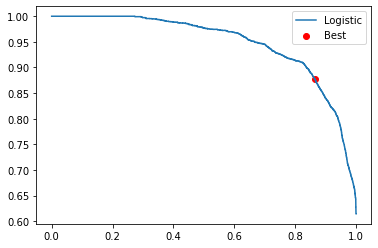

In [24]:
predictProba = LR3.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning3, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = 'Logistic')
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [25]:
predictProba = LR3.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test3, y_pred))
print("confusion matrix\n", confusion_matrix(y_test3, y_pred))
print("precision score =", str(precision_score(y_test3, y_pred)))
print("recall score =", str(recall_score(y_test3, y_pred)))
print("f1 score =", str(f1_score(y_test3, y_pred)))

accuracy score = 0.8625229237621168
confusion matrix
 [[5764 1032]
 [1067 7405]]
precision score = 0.8776816403935048
recall score = 0.8740557129367328
f1 score = 0.8758649240049678


### **SVM**

SVM performs well in small number of dataset
Hence it is better to Downsize the Samples and perform the training

##### **Set 70-10-10-10**

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)
X_tuning_scaled = scaler.transform(X_tuning1)

SVM1 = SVC(random_state = 42, probability = True)
SVM1.fit(X_train_scaled, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True, random_state=42)

Best Threshold = 0.8998889829308908, F-Score = 0.9995575873764931


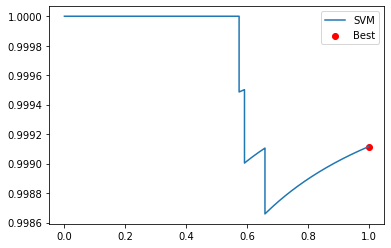

In [27]:
predictProba = SVM1.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning1, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "SVM")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [28]:
predictProba = SVM1.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test1, y_pred))
print("confusion matrix\n", confusion_matrix(y_test1, y_pred))
print("precision score = " + str(precision_score(y_test1, y_pred)))
print("recall score = " + str(recall_score(y_test1, y_pred)))
print("f1 score = " + str(f1_score(y_test1, y_pred)))

accuracy score = 0.9996725069592272
confusion matrix
 [[2716    2]
 [   0 3389]]
precision score = 0.9994102034797995
recall score = 1.0
f1 score = 0.9997050147492625


##### **Set 50-15-15-20**

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)
X_tuning_scaled = scaler.transform(X_tuning2)

SVM2 = SVC(random_state = 42, probability = True)
SVM2.fit(X_train_scaled, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True, random_state=42)

Best Threshold = 0.9063676436840573, F-Score = 0.9998033044846577


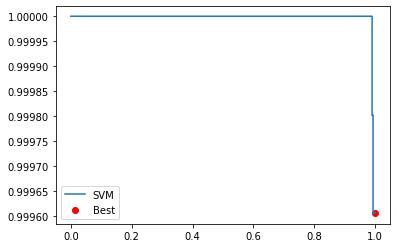

In [30]:
predictProba = SVM2.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning2, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "SVM")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [31]:
predictProba = SVM2.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("recall score = " + str(recall_score(y_test2, y_pred)))
print("f1 score = " + str(f1_score(y_test2, y_pred)))
print("accuracy score =", accuracy_score(y_test2, y_pred))
print("confusion matrix\n", confusion_matrix(y_test2, y_pred))
print("precision score = " + str(precision_score(y_test2, y_pred)))

recall score = 0.9998524638536441
f1 score = 0.9996312412419796
accuracy score = 0.9995906336990339
confusion matrix
 [[5432    4]
 [   1 6777]]
precision score = 0.9994101165019909


##### **Set 25-25-25-25**

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)
X_tuning_scaled = scaler.transform(X_tuning3)

SVM3 = SVC(random_state = 42, probability = True)
SVM3.fit(X_train_scaled, y_train3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True, random_state=42)

Best Threshold = 0.6060113665754258, F-Score = 0.9998229775181449


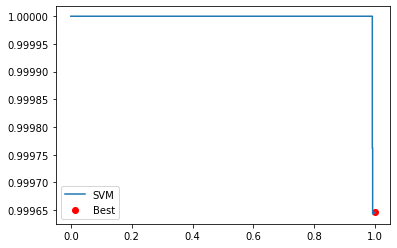

In [33]:
predictProba = SVM3.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning3, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "SVM")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [34]:
predictProba = SVM3.predict_proba(X_test_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_test3, y_pred))
print("confusion matrix\n", confusion_matrix(y_test3, y_pred))
print("precision score = " + str(precision_score(y_test3, y_pred)))
print("recall score = " + str(recall_score(y_test3, y_pred)))
print("f1 score = " + str(f1_score(y_test3, y_pred)))

accuracy score = 0.9995415247576631
confusion matrix
 [[6791    5]
 [   2 8470]]
precision score = 0.9994100294985251
recall score = 0.9997639282341831
f1 score = 0.9995869475423379


##### **Set 10-10-10-70**

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)
X_tuning_scaled = scaler.transform(X_tuning1)

SVM4 = SVC(random_state = 42, probability = True)
SVM4.fit(X_test_scaled, y_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True, random_state=42)

Best Threshold = 0.4113067137786887, F-Score = 0.9963121404336923


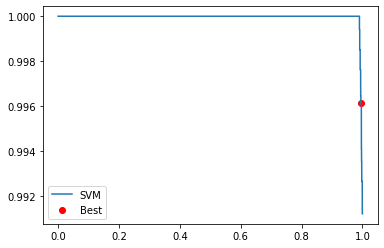

In [36]:
predictProba = SVM4.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning1, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "SVM")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [37]:
predictProba = SVM4.predict_proba(X_train_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_train1, y_pred))
print("confusion matrix\n", confusion_matrix(y_train1, y_pred))
print("precision score = " + str(precision_score(y_train1, y_pred)))
print("recall score = " + str(recall_score(y_train1, y_pred)))
print("f1 score = " + str(f1_score(y_train1, y_pred)))

accuracy score = 0.9958828483203893
confusion matrix
 [[18933    94]
 [   82 23639]]
precision score = 0.9960392702144693
recall score = 0.9965431474221155
f1 score = 0.9962911451089476


##### **Set 20-15-15-50**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)
X_tuning_scaled = scaler.transform(X_tuning2)

SVM5 = SVC(random_state = 42, probability = True)
SVM5.fit(X_test_scaled, y_test2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True, random_state=42)

Best Threshold = 0.7487411467092117, F-Score = 0.9996066863323501


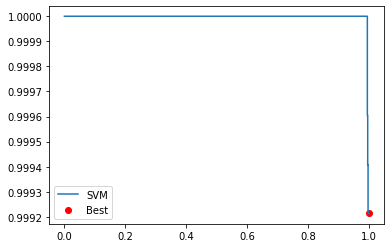

In [39]:
predictProba = SVM5.predict_proba(X_tuning_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_tuning2, predictProba)

fSscores = (2 * precision * recall)/(precision + recall)
fSscores = [0 if pd.isna(x) else x for x in fSscores]
# locate the index of the largest f score
ix = argmax(fSscores)

# plot the roc curve for the model
plt.plot(recall, precision, label = "SVM")
plt.scatter(recall[ix], precision[ix], marker = 'o', color = 'red', label = 'Best')
plt.legend()

print("Best Threshold = {}, F-Score = {}".format(thresholds[ix], fSscores[ix]))

In [40]:
predictProba = SVM5.predict_proba(X_train_scaled)[:, 1]
y_pred = to_labels(predictProba, thresholds[ix])

print("accuracy score =", accuracy_score(y_train2, y_pred))
print("confusion matrix\n", confusion_matrix(y_train2, y_pred))
print("precision score = " + str(precision_score(y_train2, y_pred)))
print("recall score = " + str(recall_score(y_train2, y_pred)))
print("f1 score = " + str(f1_score(y_train2, y_pred)))

accuracy score = 0.9994104739134707
confusion matrix
 [[13573    17]
 [    1 16942]]
precision score = 0.9989975824046229
recall score = 0.9999409785752228
f1 score = 0.9994690578726919
